# Графичко представљање података

Велику количину података није лако представити. Због тога се подаци организују у табеле, групишу, пребројавају... Зато се раде обрада и анализа података. Да би овај процес био једноставнији и разумљивији потребно је да "видимо" податке. Графичко представљање података постоји већ вековима, али никада није било тако важно као данас када је количина података са којом се срећемо неупоредиво већа него раније. Графичко приказивање података, или визуелизација, има задатак да верно прикаже податке и истакне оно што сматрамо најважнијим. Иако ова два захтева могу да буду супротстављена, добра визуелизација мора да испуни оба.

Да бисмо податке графички приказали у Пајтону потребно је да их организујемо у низове или табеле.

## Коришћење библиотеке _matplotlib.pyplot_ за визуелизацију

Стандардна Пајтонова библиотека нема функције за цртање графика. Зато је неопходно да увеземо неку која те функције има. Најчешће се за визуелизацију увози библиотека _matplotlib.pyplot_. Због тога многи Пајтон програми на самом почетку имају `import matplotlib.pyplot as plt`, што значи да одмах увозимо тражену библиотеку компликованог имена уз напомену да ћемо је убудуће позивати преко скраћеног имена `plt`. 

In [1]:
import matplotlib.pyplot as plt

Ова библиотека има огроман број различитих функција и опција за приказивање резултата. (Пробајте `dir(plt)` да видите шта све у библиотеци постоји.) Ми ћемо овде приказати само неколико најчешће коришћених.

## Линијски, тачкасти и стубичасти дијаграми

Екран рачунара, као и папир на ком цртамо графиконе, има две димензије које користимо за потребе визуелизације. Где год да ставимо тачку, она има две координате: _x_ по хоризонтали и _y_ по вертикали. Како год да приказујемо податке, морамо да их сведемо на две димензије и да цео графикон прикажемо као скуп тачака у равни. Због тога су најједноставнији они графикони где низ тачака одређују два низа координата, један за _x_, други за _y_-осу.

У следећем примеру ћемо помоћу функције `.scatter()` приказати тачке одређене са два низа координата: `x=[3,4,5]` и `y=[4,2,1]`. Приметите како за низове координата користимо листе. Тако је најједноставније.

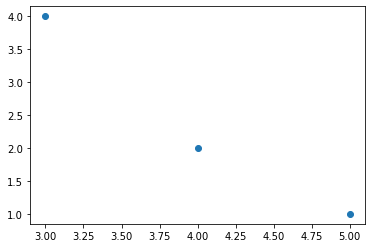

In [2]:
x=[3,4,5]
y=[4,2,1]
plt.scatter(x,y)

Вероватно примећујете да координатни систем не почиње од нуле. Функција сама подешава границе тако да максимално искорити простор који је на располагању. То можете да промените сами помоћу функција `.xlim()` и `.ylim()`. Ставите, на пример,
```
plt.xlim([0,6])
plt.ylim([0,6])
```
одмах после линије у којој је `.scatter()` функција.

> Напомена: Осим што цртају график, графичке функције, као и било које друге функције, врећају одговарајућу вредност. У претходном примеру смо видели да је изнад графика исписан текст `<matplotlib.collections.PathCollection at 0x1866f81a460>`. Та нам вредност као повратна информација углавном није потребна, а често квари изглед графика. Ако желимо да функција не исписује ту вредност, на крају реда који исцртава график ставите тачка-зарез `;`. У наредним примерима ћемо овако завршавати ове линије кода како не би било непотребног исписа.

Претходни пример је вероватно превише једноставан па ћемо дати један сложенији. Ми у пракси ретко кад укуцавамо све вредности које треба приказати на графику. Податке за график или учитавамо из неког фајла или их рачунамо. Овде ћемо дати пример са рачунањем вредности. Конкретно, узећемо све целобројне вредности од -5 до 5 за _x_ координату, а њихове квадрате за _y_ координату.

Начин на који записујемо све бројаве од -5 до 5 вам је можда необичан, али не желимо да куцамо свих 11 бројева. Зато користимо колекцију типа `range()` која даје све те бројеве, да би је потом претворили у листу помоћу функције `list()`. За другу координату рачунамо вредности користећи _list comprehension_ конструкцију. Унутар угластих заграда пише да у листу уносимо квадрате броја `t` за свако `t` из листе `x`. На крају прикажемо податке на графику као што смо радили и у претходном примеру. 

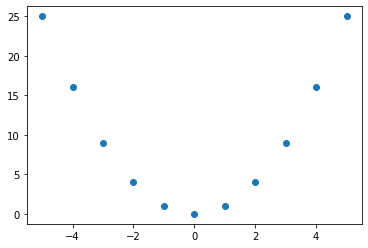

In [3]:
x=list(range(-5,6))
y=[t**2 for t in x]
plt.scatter(x,y);

> Ако желите да се на графику појави мрежа хоризонталних и вертикалних линија за вредности које су већ означене на _x_ и _y_ оси, после линије која исцртава график додајте линију која црта мрежу: `plt.grid()`.

Тачкасти дијаграми су стандарни начин приказа података који су добијени мерењем. Ипак, често се уместо тачкастих користе линијски дијаграми који суседне тачке у низу повезују правим линијама, односно дужима. За овај тип дијаграма користимо функцију `.plot()`. Да видимо сад исте оне податке од малопре на линијском дијаграму. 

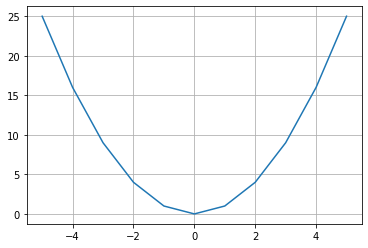

In [4]:
x=list(range(-5,6))
y=[t**2 for t in x]
plt.plot(x,y)
plt.grid()

Овако смо добили изломљену криву линију која личи на параболу. Ако хоћете да буде мање изломљена, узмите више тачака из интервала од -5 до 5.

__Задатак 1__: Нацртајте линијски дијаграм са вредностима функције $1/x$ за $x\in\{1,2,3,4,5,6\}$.

Некад имамо само један низ података који хоћемо да прикажемо графички. На пример, број поена који је дао Стеф Кари у финалној серији НБА лиге (2022. године): 34, 29, 31, 43, 16, 34. Како да прикажемо ове податке кад имамо само једну координату? Истина је, заправо, да имамо и другу, само што није експлицитно наведена. То је редни број утакмице. Пошто података о броју поена има шест, онда су одговарајуће вредности за _x_-координату бројеви од 1 до 6. 

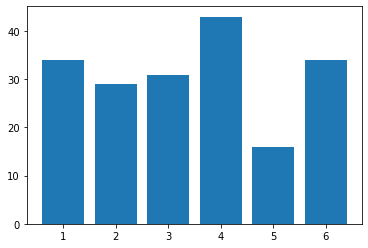

In [5]:
pts=[34,29,31,43,16,34]
plt.bar([1,2,3,4,5,6],pts);

За разлику од тачкастих и линијских дијаграма где вредности за _x_ и _y_ координате могу да имају било које нецелобројне вредности, стубичасте дијаграме обично користимо за податке који на _x_-оси имају узастопне целобројне вредности, редне бројеве или стрингове као називе категорија. Идеја стубичастог дијагарама је да омогући лако поређење између вредности у низу. То се најбоље види ако су разлике између _x_-вредности суседних стубића свугде исте. Због тога су редни бројеви или називи категорија идеални за ознаке на _x_-оси.

Уместо бројева од 1 до 6 можемо да ставимо одговарајућа имена категорија, нпр. "прва", "друга", ..., "шеста" утакмица. Графикон ће и тада изгледати исто, само ће ознаке на _x_-оси бити другачије.

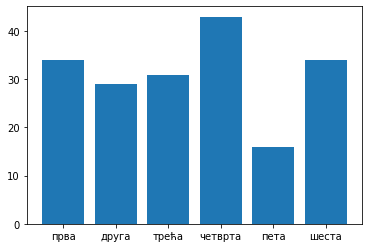

In [6]:
labels=['прва','друга','трећа','четврта','пета','шеста']
plt.bar(labels,pts);

__Задатак 2__: Нацртајте стубичасти дијаграм за број дана у сваком месецу у (не-преступној) години.

__Секторски дијаграми__ (или "питице") могу да прикажу исте ове податке. Они површину круга деле на делове (секторе) чије су површине сразмерне вредностима у низу. Овај тип дијаграма се сматра атрактивним иако има лошу прегледност и слабе могућности поређења вредности у низу. Секторске дијаграме не би требало користити када је потребно да се лако упореде вредности у низу или да се уочи тренд промене. Ови дијаграми имају највише смисла када приказују удео одређених вредности у укупном броју. На пример, да прикажу удео укупног броја поена по утакмицама који је Стеф Кари дао у финалној серији.

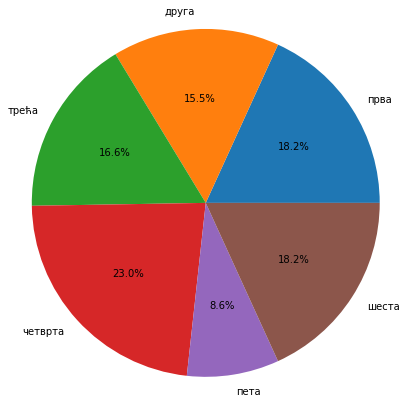

In [7]:
plt.pie(pts,labels=labels,autopct='%.1f%%',radius=2);

Параметар `autopct` одређује да ли ће се и на који начин приказати проценат учешћа сваке вредности у укупном збиру. Вредност `'%.1f%%'` коју придружујемо том параметру говори функцији `.pie()` да за сваку вредност из низа `pts` израчуна проценат учешћа у збиру, прикаже га са тачно једном цифром иза децималне тачке и претвори тај резултат у стринг који се завршава знаком `%`. Коначно, функција ову вредност приказује унутар одговарајућег сектора. Овај формат записа заиста не морате да памтите. Кад вам затреба, увек можете да се вратите на овај пример или неки сличан и видите како је ту урађено.

Параметар `radius` одређује величину секторског дијаграма. Овде смо ставили вредност 2. Слободно пробајте са другим вредностима да видите како график изгледа. 

__Задатак 3__: Нацртајте секторски дијаграм за вредности `[1/3,1/4,1/5,1/6,1/20]` са ознакама `["1/3","1/4","1/5","1/6","1/20"]`.

## Хистограм

Хистограм је графички приказ расподеле бројачаних података у одређеном скупу. Идеја хистограма је да се распон од најмањег до највећег броја у скупу подели на интервале исте ширине, да се преброји колико бројева упада у који од тих интервала и да се, коначно, резултат тог пребројавања прикаже као стубичасти дијаграм по тим интервалима.

Иако хистограм изгледа као стубичасти дијаграм, постоје разлике. Док се стубичасти дијаграм приказује за низ бројева на _x_-оси, код хистограма се стубићи придружују интервалима. Осим тога, хистограм пре приказивања ради статистичку обраду података, односно дељење на интервале и пребројавање одговарајућих вредности.

Да бисмо добили неке случајне вредности бројева које треба приказати на хистограму, прво ћемо генерисати неколико таквих бројева помоћу функције `.random()` из `random` библиотеке. Ова функција даје случајан број између 0 и 1. Ако 100 пута генеришемо случајан број на овај начин и све их ставимо у листу, добићемо низ од 100 независно добијених случајних бројева.   

In [8]:
import random                             # prvo uvozimo biblioteku
rb=[random.random() for i in range(100)]  # za pravljenje liste koristimo list comprehension
print(rb[0:6])                            # prikazujemo prvih šest brojeva iz liste

[0.7894261700119348, 0.49039709093610706, 0.8949338628569771, 0.4803895863754344, 0.9532400916074815, 0.6725419395517317]


Да не бисмо штампали вредности свих сто елемената листе, боље да их прикажемо као хистограм. За то користимо функцију `hist()` која има само један аргумент: назив листе. 

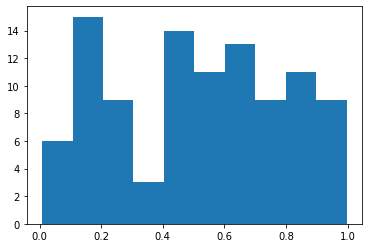

In [9]:
plt.hist(rb);

Добили смо хистограм. Он, истини за вољу, није најпрегледнији јер не знамо где су тачно границе интервала и колике су за њих вредности стубића. То можемо још мало да средимо. Прво ћемо да кажемо функцији `.hist()` да не дели интервал од најмање до највеће вредности на подинтервале, него да то уради за интервал од 0 до 1. То радимо тако што функцији уз аргумент који смо већ унели, саопштимо и да су границе тог великог интервала (_range_) 0 и 1. Онда ће границе подинтервала бити тачно на 0, 0.1, 0.2, итд. Друго, нацртаћемо мрежу (_grid_) преко графика да бисмо боље видели вредности и границе интервала.

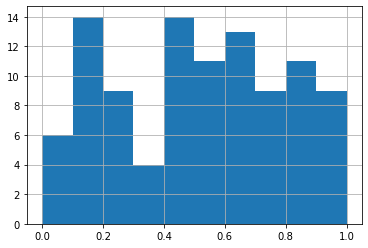

In [10]:
plt.hist(rb,range=(0,1))
plt.grid()

Сада је резулат свакако прегледнији и лакши за читање.